# creating an aggregated table for the bundesländer


In [2]:
import numpy as np
import pandas as pd
import warnings
import os

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['savefig.dpi'] = 300
matplotlib.rcParams['figure.figsize'] = [12,6]

# With additional data

## Relative numbers
number of accidents relative to number of inhapitants (accidents per capita)

In [14]:
acci = pd.read_csv(os.path.join("../data","Unfallorte2019_LinRef.txt"),sep=';')

In [16]:
acci.columns

Index(['OBJECTID', 'ULAND', 'UREGBEZ', 'UKREIS', 'UGEMEINDE', 'UJAHR',
       'UMONAT', 'USTUNDE', 'UWOCHENTAG', 'UKATEGORIE', 'UART', 'UTYP1',
       'ULICHTVERH', 'IstRad', 'IstPKW', 'IstFuss', 'IstKrad', 'IstGkfz',
       'IstSonstige', 'LINREFX', 'LINREFY', 'XGCSWGS84', 'YGCSWGS84',
       'STRZUSTAND'],
      dtype='object')

In [18]:
pop = pd.read_csv(os.path.join("../data","population2019.csv"), sep=';', skiprows=1)

In [17]:
pop

,Bundesland,Einwohner31122019
0,Baden-Württemberg,11100394
1,Bayern,13124737
2,Berlin,3669491
3,Brandenburg,2521893
4,Bremen,681202
5,Hamburg,1847253
6,Hessen,6288080
7,Mecklenburg-Vorpommern,1608138
8,Niedersachsen,7993608
9,Nordrhein-Westfalen,17947221


In [ ]:
# from documentation
# DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes='_x', '_y', copy=True, indicator=False, validate=None)

In [19]:
# ydata = acci['OBJECTID'].groupby(acci['ULAND']).agg('count')
acciByBu = acci.groupby(acci['ULAND'])['OBJECTID'].agg('count')
# sum(acciByBu) #check, adds to 268,370
acciByBu # its a Series

ULAND
1     11282
2      6827
3     26908
4      2940
5     57454
6     18951
7     13093
8     32964
9     47461
10     3361
11    13390
12     8691
14    12625
15     7124
16     5299
Name: OBJECTID, dtype: int64

In [21]:
b = acci.groupby(acci['ULAND'])['IstFuss','IstRad','IstKrad','IstPKW','IstGkfz','IstSonstige'].sum()

#print(b.head)
c = pd.DataFrame(data=['Schleswig-Holstein','Hamburg','Niedersachsen','Bremen','Nordrhein-Westfalen','Hessen','Rheinland-Pfalz','Baden-Württemberg','Bayern','Saarland','Berlin','Brandenburg','Mecklenburg-Vorpommern','Sachsen','Sachsen-Anhalt','Thüringen'], columns=['name'])
c['ULAND']=np.arange(1,17,1) # from meta data to Unfallatlas

b=b.merge(c, on='ULAND')
#print('merge b,c')
#print(b.head)
b=b.merge(acciByBu, on='ULAND')
b.rename(columns={'OBJECTID':'accidents'}, inplace=True)
#print('merge b,acciByBu')
#print(b.head)
b=b.merge(pop, left_on='name', right_on='Bundesland')
#print('merge b,pop')
#print(b.head)
b=b.drop('name',axis=1)
b

/opt/anaconda3/envs/urbtech/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,ULAND,IstFuss,IstRad,IstKrad,IstPKW,IstGkfz,IstSonstige,accidents,Bundesland,Einwohner31122019
0,1,847,3895,1264,8676,439,1084,11282,Schleswig-Holstein,2903773
1,2,926,2310,609,5653,360,999,6827,Hamburg,1847253
2,3,1841,7783,3067,22384,1490,2441,26908,Niedersachsen,7993608
3,4,339,1174,229,2318,129,365,2940,Bremen,681202
4,5,7084,16740,7694,46418,2554,5585,57454,Nordrhein-Westfalen,17947221
5,6,1741,3501,2628,16277,1123,2032,18951,Hessen,6288080
6,7,1181,2239,2403,10793,624,1123,13093,Rheinland-Pfalz,4093903
7,8,2768,8188,5280,26243,1741,3118,32964,Baden-Württemberg,11100394
8,9,3352,13698,7131,36095,2565,3884,47461,Bayern,13124737
9,10,353,437,461,2873,120,305,3361,Saarland,986887


In [10]:
b['ped acc per 10K inhab']= 10000*b['IstFuss']/b['Einwohner31122019'] # pedestrians involved in accident per 10K inhabitant

In [11]:
b

,ULAND,IstFuss,IstRad,IstKrad,IstPKW,IstGkfz,IstSonstige,accidents,Bundesland,Einwohner31122019,ped acc per 10K inhab
0,1,847,3895,1264,8676,439,1084,11282,Schleswig-Holstein,2903773,2.916895
1,2,926,2310,609,5653,360,999,6827,Hamburg,1847253,5.012849
2,3,1841,7783,3067,22384,1490,2441,26908,Niedersachsen,7993608,2.303090
3,4,339,1174,229,2318,129,365,2940,Bremen,681202,4.976497
4,5,7084,16740,7694,46418,2554,5585,57454,Nordrhein-Westfalen,17947221,3.947129
5,6,1741,3501,2628,16277,1123,2032,18951,Hessen,6288080,2.768731
6,7,1181,2239,2403,10793,624,1123,13093,Rheinland-Pfalz,4093903,2.884778
7,8,2768,8188,5280,26243,1741,3118,32964,Baden-Württemberg,11100394,2.493605
8,9,3352,13698,7131,36095,2565,3884,47461,Bayern,13124737,2.553956
9,10,353,437,461,2873,120,305,3361,Saarland,986887,3.576904


In [ ]:
# I should calculate the number of total accidents

## accidents with PKW and motorbikes relative to milion km driven
Data available for each Bundesland, data available through Genesis (use API https://www-genesis.destatis.de/genesis/online?operation=previous&levelindex=0&step=0&titel=Webservice&levelid=1604268600667&acceptscookies=false#abreadcrumb ) or from the statistikportal.de website
https://www.statistikportal.de/de/ugrdl/ergebnisse/verkehr-und-umwelt/fkm (scrape from html, extract table)

In [24]:
fl = pd.read_csv(os.path.join("../data","Fahrleistungen-der-im-Bundesland-zugelassenen-Krafträder-PKW.csv"), sep=',', skiprows=2)
fl.head

<bound method NDFrame.head of                 Bundesland  Fahrleistung gesamt  Krafträder     PKW
0        Baden-Württemberg               104338        1993   90046
1                   Bayern               127433        2730  106751
2                   Berlin                17897         314   14923
3              Brandenburg                25293         369   20853
4                   Bremen                 4351          61    3675
5                  Hamburg                11333         159    9483
6                   Hessen                60368         985   52592
7   Mecklenburg-Vorpommern                14119         195   11310
8            Niedersachsen                80414        1248   68706
9      Nordrhein-Westfalen               160422        2478  137212
10         Rheinland-Pfalz                41273         726   35396
11                Saarland                10771         179    9508
12                 Sachsen                34962         504   28642
13          Sachse

In [25]:
# fl.columns
b=b.merge(fl, on='Bundesland')

In [28]:
c = b.copy()
#c = c.drop(['IstFuss', 'IstRad','IstGkfz','IstSonstige'],axis=1)
d = c.copy()
d['Krad_rel'] = d['IstKrad']/ d['Krafträder']
d['PKW_rel'] = d['IstPKW'] / d['PKW'] # number of accidents involving PKW relative to Million km driven by PKW for PKW admitted / licensed in each Bundesland
d['fahrfreude'] = d['Fahrleistung gesamt'] / d['Einwohner31122019']
d

,ULAND,IstFuss,IstRad,IstKrad,IstPKW,IstGkfz,IstSonstige,accidents,Bundesland,Einwohner31122019,Fahrleistung gesamt,Krafträder,PKW,Krad_rel,PKW_rel,fahrfreude
0,1,847,3895,1264,8676,439,1084,11282,Schleswig-Holstein,2903773,29640,437,25329,2.892449,0.342532,0.010207
1,2,926,2310,609,5653,360,999,6827,Hamburg,1847253,11333,159,9483,3.830189,0.596119,0.006135
2,3,1841,7783,3067,22384,1490,2441,26908,Niedersachsen,7993608,80414,1248,68706,2.457532,0.325794,0.010060
3,4,339,1174,229,2318,129,365,2940,Bremen,681202,4351,61,3675,3.754098,0.630748,0.006387
4,5,7084,16740,7694,46418,2554,5585,57454,Nordrhein-Westfalen,17947221,160422,2478,137212,3.104923,0.338294,0.008939
5,6,1741,3501,2628,16277,1123,2032,18951,Hessen,6288080,60368,985,52592,2.668020,0.309496,0.009600
6,7,1181,2239,2403,10793,624,1123,13093,Rheinland-Pfalz,4093903,41273,726,35396,3.309917,0.304921,0.010082
7,8,2768,8188,5280,26243,1741,3118,32964,Baden-Württemberg,11100394,104338,1993,90046,2.649272,0.291440,0.009399
8,9,3352,13698,7131,36095,2565,3884,47461,Bayern,13124737,127433,2730,106751,2.612088,0.338123,0.009709
9,10,353,437,461,2873,120,305,3361,Saarland,986887,10771,179,9508,2.575419,0.302167,0.010914


In [33]:
# write table to file
d.to_csv('../data/bundeslaender.csv')

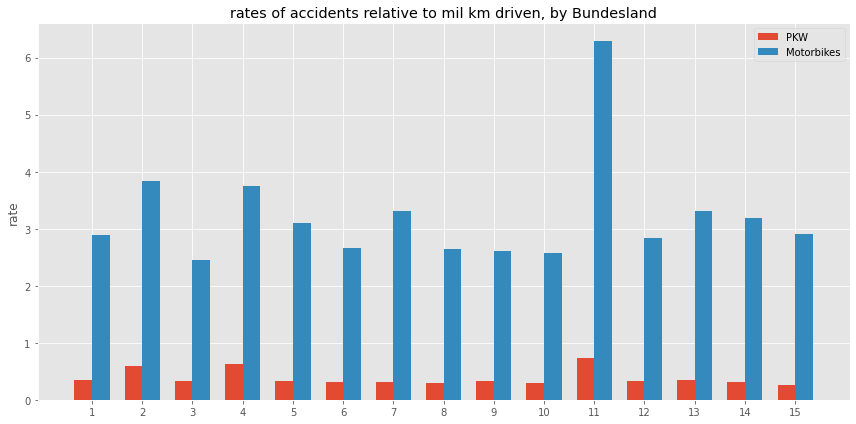

In [34]:
labels = range(1,16)
men_means = d['PKW_rel']
women_means = d['Krad_rel']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, d['PKW_rel'], width, label='PKW')
rects2 = ax.bar(x + width/2, d['Krad_rel'], width, label='Motorbikes')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('rate')
ax.set_title('rates of accidents relative to mil km driven, by Bundesland')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()

Interpretation: cities like Berlin, Hamburg, Bremen have way higher rates for PKW and motorbikes than the Flächenländer.

Looks like there are more (relative) accidents in cities than in the countryside.

We could check this by comparing to cities, especially Kreisfreie Städte, that is: municipalities / administrative areas consisting only of urban areas.
        
Cities like Berlin, Bremen, Hamburg have lower rates of kilometers driven / inhabitant. People use more public transport or bikes. Is this relevant for the rates of accidents??        

In [36]:
# code to learn from, plt documentation
'''x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
fig = plt.figure()
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
fig.suptitle('Sharing both axes')
axs[0].plot(x, y ** 2)
axs[1].plot(x, 0.3 * y, 'o')
axs[2].plot(x, y, '+')

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer() '''

"x = np.linspace(0, 2 * np.pi, 400)\ny = np.sin(x ** 2)\nfig = plt.figure()\ngs = fig.add_gridspec(3, hspace=0)\naxs = gs.subplots(sharex=True, sharey=True)\nfig.suptitle('Sharing both axes')\naxs[0].plot(x, y ** 2)\naxs[1].plot(x, 0.3 * y, 'o')\naxs[2].plot(x, y, '+')\n\n# Hide x labels and tick labels for all but bottom plot.\nfor ax in axs:\n    ax.label_outer() "